分析IMDb(網路電影資料庫)排名前一千的電影資料

資料來源

https://www.kaggle.com/datasets/ramjasmaurya/top-250s-in-imdb

# 資料導入

In [1]:
import pandas as pd

In [2]:
address = 'imdb (1000 movies) in june 2022.csv'
df = pd.read_csv(address)
df.head(1)

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M


In [3]:
df.rename(
    columns={"ranking of movie\r\n": "ranking of movie", "movie name\r\n": "movie name", "DETAIL ABOUT MOVIE\n":"DETAIL ABOUT MOVIE", "DIRECTOR\r\n":"DIRECTOR","ACTOR 1\n":"ACTOR 1", "ACTOR 2\n":"ACTOR 2", "GROSS COLLECTION\r\n":"GROSS COLLECTION"},
    inplace=True,
)

In [4]:
df.set_index('ranking of movie', inplace=True)
df.head(1)

,movie name,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE,DIRECTOR,ACTOR 1,ACTOR 2,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION
ranking of movie,,,,,,,,,,,,,,,
1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M


In [5]:
df['Year'] = df['Year'].str.strip('-')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1,000.00
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie name          1000 non-null   object 
 1   Year                1000 non-null   object 
 2   certificate         995 non-null    object 
 3   runtime             1000 non-null   object 
 4   genre               1000 non-null   object 
 5   RATING              1000 non-null   float64
 6   metascore           837 non-null    float64
 7   DETAIL ABOUT MOVIE  1000 non-null   object 
 8   DIRECTOR            1000 non-null   object 
 9   ACTOR 1             1000 non-null   object 
 10  ACTOR 2             1000 non-null   object 
 11  ACTOR 3             1000 non-null   object 
 12  ACTOR 4             1000 non-null   object 
 13  votes               1000 non-null   object 
 14  GROSS COLLECTION    820 non-null    object 
dtypes: float64(2), object(13)
memory usage: 125.0+ KB


In [7]:
del df['certificate']
del df['metascore']
# 這兩個欄位有缺失值，且後續分析不會用到，故刪除

In [8]:
df['GROSS COLLECTION'].fillna(0, inplace=True)

# 數據分析
以下全部分析內容，皆以imdb排名前一千的電影名單為分析對象

## 獲得最多觀眾投票數的前十名電影

In [9]:
df['votes'] = df['votes'].str.replace(',','').astype(int)
df[['movie name', 'Year', 'votes']].nlargest(10, 'votes')

,movie name,Year,votes
ranking of movie,,,
1,The Shawshank Redemption,1994,2603314
3,The Dark Knight,2008,2574810
10,Inception,2010,2284252
12,Fight Club,1999,2050591
14,Forrest Gump,1994,2011517
9,Pulp Fiction,1994,1995346
17,The Matrix,1999,1868779
13,The Lord of the Rings: The Fellowship of the Ring,2001,1808760
2,The Godfather,1972,1798731


## 最高票房收益的前十名電影

In [10]:
df['GROSS COLLECTION'] = df['GROSS COLLECTION'].str.strip('$M').astype('float')
df[['movie name', 'Year', 'GROSS COLLECTION']].nlargest(10, 'GROSS COLLECTION')

,movie name,Year,GROSS COLLECTION
ranking of movie,,,
610,Star Wars: Episode VII - The Force Awakens,2015,936.66
66,Avengers: Endgame,2019,858.37
100,Spider-Man: No Way Home,2021,804.75
644,Avatar,2009,760.51
67,Avengers: Infinity War,2018,678.82
526,Titanic,1997,659.33
364,Avengers Assemble,2012,623.28
913,The Incredibles 2,2018,608.58
3,The Dark Knight,2008,534.86


## 電影年代分布

In [11]:
year_subset = df[df['Year'].str.isdigit()]
year_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 967 entries, 1 to 1,000.00
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie name          967 non-null    object 
 1   Year                967 non-null    object 
 2   runtime             967 non-null    object 
 3   genre               967 non-null    object 
 4   RATING              967 non-null    float64
 5   DETAIL ABOUT MOVIE  967 non-null    object 
 6   DIRECTOR            967 non-null    object 
 7   ACTOR 1             967 non-null    object 
 8   ACTOR 2             967 non-null    object 
 9   ACTOR 3             967 non-null    object 
 10  ACTOR 4             967 non-null    object 
 11  votes               967 non-null    int32  
 12  GROSS COLLECTION    791 non-null    float64
dtypes: float64(2), int32(1), object(10)
memory usage: 102.0+ KB


<AxesSubplot:>

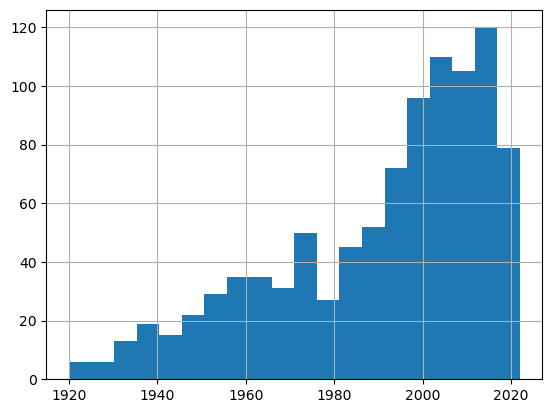

In [12]:
year_subset['Year'].astype('int').hist(bins=20)

## 電影平均時長

In [13]:
df['runtime'] = df['runtime'].str.strip(' min').astype(int)

In [14]:
round(df['runtime'].mean(),0)

# 平均時長為124分鐘

124.0

## 電影平均評分

In [15]:
round(df['RATING'].mean(),2)

# 前一千名的電影平均得分為7.96

7.96

## 出演最多次的演員前十名

In [16]:
actor_list = df['ACTOR 1'].values.tolist() + df['ACTOR 2'].values.tolist() + df['ACTOR 3'].values.tolist()+df['ACTOR 4'].values.tolist()

actor_df = pd.DataFrame(actor_list)

actor_df.value_counts().head(10)

Robert De Niro       16
Tom Hanks            14
Al Pacino            13
Leonardo DiCaprio    11
Matt Damon           11
James Stewart        11
Clint Eastwood       11
Christian Bale       11
Brad Pitt            11
Humphrey Bogart      10
dtype: int64


## 時數最長的電影

In [17]:
df.nlargest(5, 'runtime')[['movie name', 'runtime']]

,movie name,runtime
ranking of movie,,
148,Gangs of Wasseypur,321
356,Zack Snyder's Justice League,242
673,Hamlet,242
201,Gone with the Wind,238
115,Once Upon a Time in America,229



## 時數最短的電影

In [18]:
df.nsmallest(5, 'runtime')[['movie name', 'runtime']]

,movie name,runtime
ranking of movie,,
205,Sherlock Jr.,45
461,The Cabinet of Dr. Caligari,58
588,Freaks,64
203,The General,67
135,The Kid,68
